# 一维光谱模拟（`spec1d`）

In [23]:
from gehong import spec1d as s
from gehong import config as c
import numpy as np
import matplotlib.pyplot as plt

### 光谱格式配置项

`config`模块用来配置模拟光谱的格式，包括波长方向配置（波长范围、波长间隔）和空间方向配置（像素数、像素大小）。默认配置下模拟得到的三维数据立方可直接用于`csst-ifs-etc`的计算。

In [24]:
config = c.config()

# 电离气体发射线

该功能可以用来模拟HII区、行星状星云、AGN窄线区的电离气体发射线模拟。

### 电离气体发射线模板配置

`spec1d.EmissionLineTemplate`模块用来配置电离气体发射线的模板，单条发射线用高斯模型进行模拟。该模块提供了两个版本的发射线模板：HII区模板（`model = 'hii'`）和AGN窄线区模板（`model = 'nlr'`）。

In [3]:
gas_tem = s.EmissionLineTemplate(config, model = 'hii')

### HII区发射线光谱模拟

`spec1d.HII_Region`模块用来模拟HII区的发射线光谱。基于`cloudy`计算的发射线线强比数据，通过输入的气相金属丰度`logz`选择与之匹配的线强比，通过H$\alpha$发射线的积分流量`halpha`（单位：$10^{-17} erg/s/cm^2$）确定光谱的绝对流量。该模块考虑了视向速度`vel`产生的红移效应、速度弥散`vdisp`产生的致宽和尘埃消光`ebv`产生的红化。

最后模拟得到的光谱流量`.flux`单位为$10^{-17} erg/s/A/cm^2$

In [4]:
gas1 = s.HII_Region(config, gas_tem, halpha = 100, logz = 0,
                    vel = 100, vdisp = 120, ebv = 0.1)
gas2 = s.HII_Region(config, gas_tem, halpha = 100, logz = -1,
                    vel = 100, vdisp = 120, ebv = 0.1)

#### 不同气相金属丰度产生的光谱对比

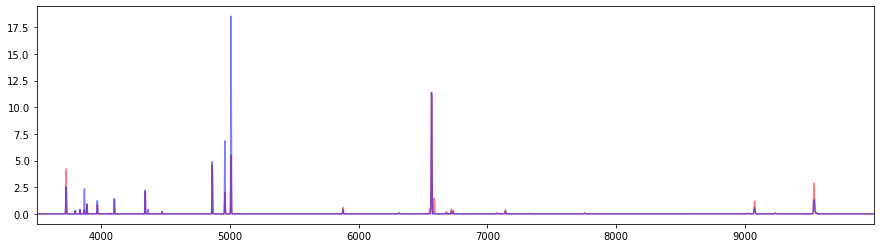

In [5]:
plt.figure(figsize=(15,4))
plt.plot(gas1.wave, gas1.flux, color='red',alpha=0.5)
plt.plot(gas2.wave, gas2.flux, color='blue',alpha=0.5)
plt.xlim(min(gas1.wave),max(gas1.wave))
plt.show()

## 恒星星族光谱

该功能可以用来模拟星系的恒星连续谱

### 恒星星族模板配置

`spec1d.StellarContinuumTemplate`模块用来配置恒星星族模板。该模块采用的是`emiles`的单星族模板。

In [6]:
stellar_tem = s.StellarContinuumTemplate(config)

### 恒星连续谱模拟

`spec1d.StellarContinuum`模块用来模拟恒星连续谱。基于`spec1d.StellarContinuumTemplate`提供的恒星星族模板，
通过输入的年龄`age`和金属丰度`feh`来确定对应的恒星星族模板，通过SDSS r波段星等`mag`来确定光谱的绝对流量。
该模块考虑了视向速度`vel`产生的红移效应、速度弥散`vdisp`产生的致宽和尘埃消光`ebv`产生的红化。

最后模拟得到的光谱流量`.flux`单位为$10^{-17} erg/s/A/cm^2$

In [7]:
stellar1 = s.StellarContinuum(config, stellar_tem, mag = 15, age = 1, feh = 0, vel = 100, vdisp = 100, ebv = 0)
stellar2 = s.StellarContinuum(config, stellar_tem, mag = 15, age = 9, feh = 0, vel = 100, vdisp = 100, ebv = 0)

#### 不同气相金属丰度产生的光谱对比

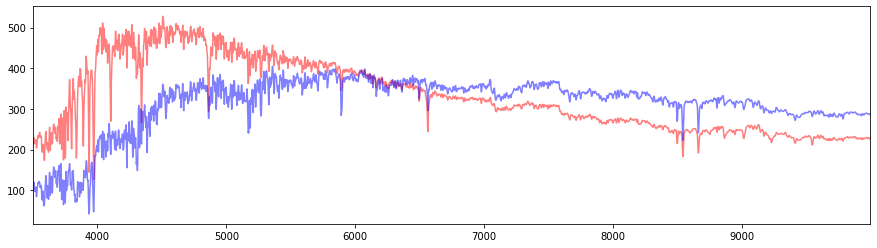

In [8]:
plt.figure(figsize=(15,4))
plt.plot(stellar1.wave, stellar1.flux, color='red',alpha=0.5)
plt.plot(stellar2.wave, stellar2.flux, color='blue',alpha=0.5)
plt.xlim(min(stellar1.wave),max(stellar1.wave))
plt.show()

## 单颗恒星光谱

该功能可以用来模拟单颗恒星的光谱

### 恒星光谱模板配置

`spec1d.SingleStarTemplate`模块用来配置单颗恒星光谱模板。该模块采用的是`XSL`的恒星光谱模板。

In [9]:
star_temp = s.SingleStarTemplate(config)

### 单颗恒星光谱模拟

`spec1d.SingleStar`模块用来模拟单颗恒星光谱。基于`spec1d.SingleStarTemplate`提供的恒星光谱模板，
通过输入的有效温度`teff`和金属丰度`feh`来确定对应的恒星光谱模板，通过SDSS r波段星等`mag`来确定光谱的绝对流量。
该模块考虑了视向速度`vel`产生的红移效应和尘埃消光`ebv`产生的红化。

最后模拟得到的光谱流量`.flux`单位为$10^{-17} erg/s/A/cm^2$

In [10]:
star1 = s.SingleStar(config, star_temp, mag = 15, teff = 10000, feh = 0, vel = 100, ebv = 0)
star2 = s.SingleStar(config, star_temp, mag = 15, teff = 6000, feh = 0, vel = 100, ebv = 0)

#### 不同有效温度产生的光谱对比

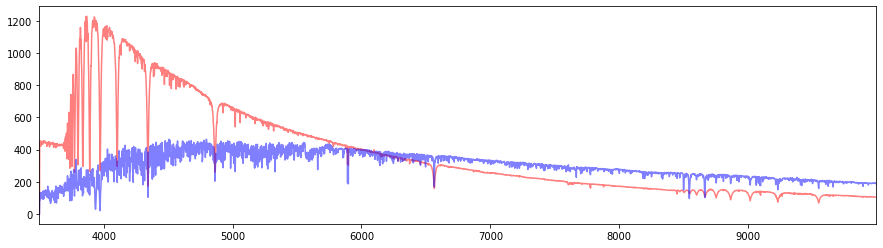

In [11]:
plt.figure(figsize=(15,4))
plt.plot(star1.wave, star1.flux, color='red', alpha = 0.5)
plt.plot(star2.wave, star2.flux, color='blue', alpha = 0.5)
plt.xlim(min(star1.wave),max(star1.wave))
plt.show()

# 活动星系核光谱

活动星系核光谱由四个成分组成：窄线区光谱、宽线区光谱、铁线光谱和幂律谱。四个成分的光谱可以分别模拟，也可以一起模拟。

## 窄线区光谱

### 窄线区气体发射线模板

与HII区光谱模拟类似，首先需要用`spec1d.EmissionLineTemplate`模块用来配置电离气体发射线的模板，其中模型选择AGN窄线区模板（`model = 'nlr'`）。

In [12]:
nlr_temp = s.EmissionLineTemplate(config, model = 'nlr')

### 窄线区气体发射线模拟

`spec1d.AGN_NLR`模块用来模拟窄线区发射线光谱。基于`cloudy`计算的发射线线强比数据，通过输入的气相金属丰度`logz`选择与之匹配的线强比，通过H$\alpha$发射线的积分流量`halpha`（单位：$10^{-17} erg/s/cm^2$）确定光谱的绝对流量。该模块考虑了视向速度`vel`产生的红移效应、速度弥散`vdisp`产生的致宽和尘埃消光`ebv`产生的红化。

最后模拟得到的光谱流量`.flux`单位为$10^{-17} erg/s/A/cm^2$

In [13]:
nlr  = s.AGN_NLR(config, nlr_temp, halpha = 100, logz = 0, vel = 1000, vdisp = 400, ebv = 0.1)
nlr1 = s.AGN_NLR(config, nlr_temp, halpha = 100, logz = -1, vel = 1000, vdisp = 400, ebv = 0.1)

#### 不同气相金属丰度的窄线区光谱对比

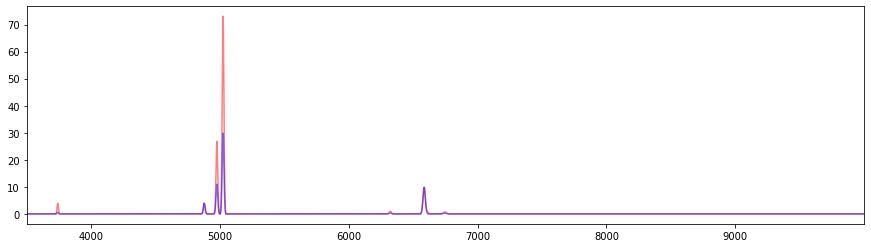

In [14]:
plt.figure(figsize=(15,4))
plt.plot(nlr.wave, nlr.flux, color='red',alpha=0.5)
plt.plot(nlr1.wave, nlr1.flux, color='blue',alpha=0.5)
plt.xlim(min(nlr.wave),max(nlr.wave))
plt.show()

## 宽线区光谱

### 宽线区气体发射线模拟

`spec1d.AGN_BLR`模块用来模拟窄线区发射线光谱。发射线线强比采用了Mrk817的观测结果，由H$\beta$半高全宽`hbeta_fwhm`来确定发射线线宽，由H$\beta$发射线的积分流量`hbeta_flux`（单位：$10^{-17} erg/s/cm^2$）确定光谱的绝对流量。该模块考虑了视向速度`vel`产生的红移效应和尘埃消光`ebv`产生的红化。

最后模拟得到的光谱流量`.flux`单位为$10^{-17} erg/s/A/cm^2$

In [15]:
blr  = s.AGN_BLR(config, hbeta_flux = 100.0, hbeta_fwhm = 2000.0, vel = 1000, ebv = 0.1)
blr1 = s.AGN_BLR(config, hbeta_flux = 100.0, hbeta_fwhm = 5000.0, vel = 1000, ebv = 0.1)

### 不同半高全宽的宽线区光谱对比

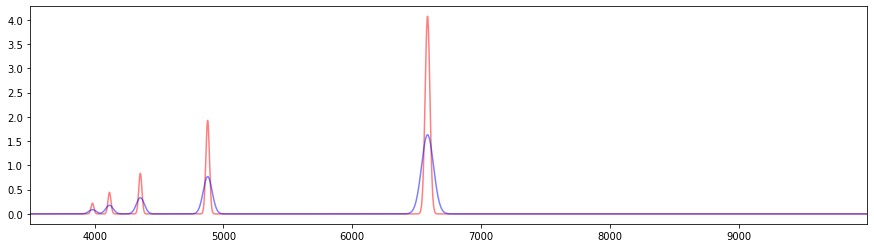

In [16]:
plt.figure(figsize=(15,4))
plt.plot(blr.wave, blr.flux, color='red',alpha=0.5)
plt.plot(blr1.wave, blr1.flux, color='blue',alpha=0.5)
plt.xlim(min(blr.wave),max(blr.wave))
plt.show()

## 铁发射线光谱

### 铁发射线光谱模拟

`spec1d.AGN_FeII`模块用来模拟AGN中的铁线发射。发射线模板采用了Park et al. (2022)的观测结果。由H$\beta$宽发射线的积分流量`hbeta_broad`和`r4570`（表征H$\beta$宽线流量与Fe4750流量之比）来决定模拟的铁发射线绝对流量。该模块考虑了视向速度`vel`产生的红移效应和尘埃消光`ebv`产生的红化。

最后模拟得到的光谱流量`.flux`单位为$10^{-17} erg/s/A/cm^2$

In [19]:
fe = s.AGN_FeII(config, hbeta_broad = 100.0, r4570 = 0.4, ebv = 0.1, vel = 100.0)
fe1 = s.AGN_FeII(config, hbeta_broad = 200.0, r4570 = 0.4, ebv = 0.1, vel = 100.0)

### 不同H$\beta$宽线流量的铁发射线光谱对比

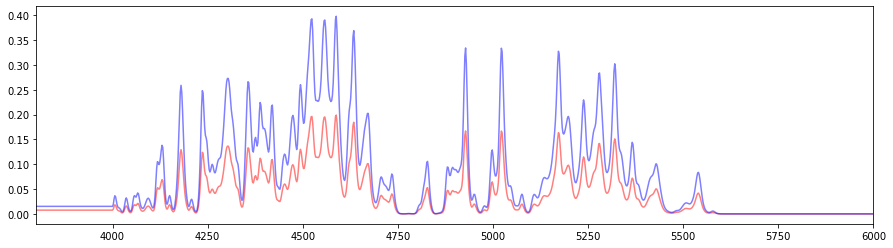

In [20]:
plt.figure(figsize=(15,4))
plt.plot(fe.wave, fe.flux, color='red',alpha=0.5)
plt.plot(fe1.wave, fe1.flux, color='blue',alpha=0.5)
plt.xlim(3800, 6000)
plt.show()

## 幂律谱

### 幂律谱模拟

`spec1d.AGN_Powerlaw`模块用来模拟AGN中的幂律谱。该模块由5100A处的平均流量`m5100`（单位：$10^{-17} erg/s/A/cm^2$）来决定模拟幂律谱的绝对流量，由幂律谱指数`alpha`来决定幂律谱的谱形。该模块考虑了视向速度`vel`产生的红移效应和尘埃消光`ebv`产生的红化。

最后模拟得到的光谱流量`.flux`单位为$10^{-17} erg/s/A/cm^2$

In [34]:
pl = s.AGN_Powerlaw(config, m5100 = 17, alpha = -1.5, vel = 1000, ebv = 0.1)
pl1 = s.AGN_Powerlaw(config, m5100 = 17, alpha = -1.0, vel = 1000, ebv = 0.1)

### 不同谱指数的幂律谱对比

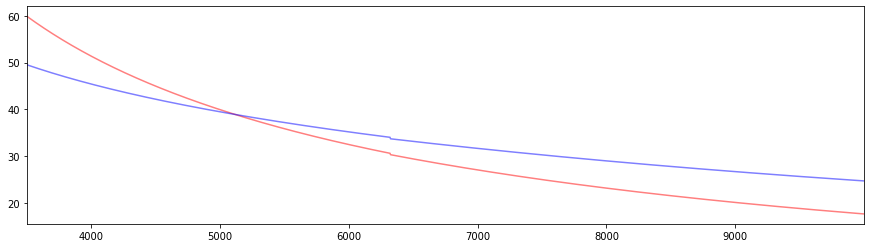

In [35]:
plt.figure(figsize=(15,4))
plt.plot(pl.wave, pl.flux, color='red',alpha=0.5)
plt.plot(pl1.wave, pl1.flux, color='blue',alpha=0.5)
plt.xlim(min(pl.wave),max(pl.wave))
plt.show()

## 活动星系核光谱模拟

`spec1d.AGN`模块可以直接用来模拟AGN的光谱。其中：
- 决定窄线区光谱：`nlr_temp`为窄线区发射线模板，`halpha_narrow`为H$\alpha$窄线成分流量，`vdisp_narrow`为H$\alpha$窄线成分速度弥散，`logz`为窄线成分气相金属丰度
- 决定宽线区光谱：`halpha_broad`为H$\alpha$宽线成分流量，`vdisp_broad`为H$\alpha$宽线成分速度弥散
- 决定铁线光谱：`halpha_broad`为H$\alpha$宽线成分流量（宽线成分和铁线成分信息绑定）
- 决定幂律谱：`bhmass`为黑洞质量，`edd_ratio`为爱丁顿比，两者决定5100A处的光度，`dist`为光度距离，决定5100A处的观测流量

该模块考虑了视向速度`vel`产生的红移效应和尘埃消光`ebv`产生的红化。

最后模拟得到的光谱流量`.flux`单位为$10^{-17} erg/s/A/cm^2$

In [31]:
agn1 = s.AGN(config, nlr_temp, bhmass = 1e5, edd_ratio = 0.05,
             halpha_broad = 100, halpha_narrow = 300, vdisp_broad = 5000, vdisp_narrow = 500, 
             vel = 1000, logz = 0, ebv = 0.1, dist = 20)
agn2 = s.AGN(config, nlr_temp, bhmass = 1e5, edd_ratio = 0.05,
             halpha_broad = 300, halpha_narrow = 100, vdisp_broad = 5000, vdisp_narrow = 500, 
             vel = 1000, logz = 0, ebv = 0.1, dist = 20)

### AGN光谱模拟展示

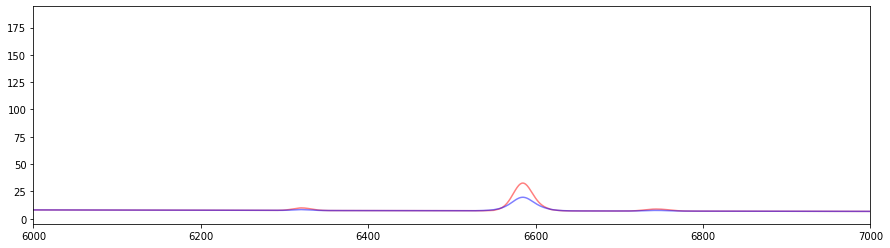

In [32]:
plt.figure(figsize=(15,4))
plt.plot(agn1.wave, agn1.flux, color = 'red', alpha = 0.5)
plt.plot(agn2.wave, agn2.flux, color = 'blue', alpha = 0.5)
#plt.xlim(min(agn1.wave),max(agn1.wave))
plt.xlim(6000,7000)
plt.show()